In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Any results you write to the current directory are saved as output.

In [0]:
#matplotlib este folosit pentru a realiza grafice
import matplotlib.pyplot as plt
plt.style.use("ggplot")


In [5]:
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart (2).csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
!pip uninstall pandas-profiling

Uninstalling pandas-profiling-1.4.1:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/pandas_profiling-1.4.1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/pandas_profiling/*
Proceed (y/n)? y
  Successfully uninstalled pandas-profiling-1.4.1


In [7]:
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 256kB 3.4MB/s 
     |████████████████████████████████| 61kB 8.6MB/s 
     |████████████████████████████████| 614kB 43.8MB/s 
     |████████████████████████████████| 3.1MB 45.6MB/s 
     |████████████████████████████████| 71kB 9.3MB/s 
     |████████████████████████████████| 296kB 47.2MB/s 
  Created wheel for confuse: filename=confuse-1.1.0-cp36-none-any.whl size=17574 sha256=170994516d631636277ef10ddabc2c8724f8525b566b48b17a1fd3ab63207443
  Stored in directory: /root/.cache/pip/wheels/f6/8b/23/41a1b516f6d8d4cc81f5bdb55394a47cdbe9659c53668d3c9e
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=544ebb83ededd1bb50e701e708d8fde7c0614fcfe83fb2d061d7cfab8c6f5671
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291990 sha256=ee8a677bee12a161e2068bf0173ca807ea235abdcc31c3f20ecb

In [8]:
from pandas_profiling import ProfileReport

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
prof=ProfileReport(df)

In [10]:
#Statisticile pot fi salvate În format html
prof.to_file(output_file='/content/output.html')

In [11]:
prof

In [0]:
#Pentru seturi de date mari este indicat să folosim versiunea minimală a librăriei
prof=ProfileReport(df,minimal=True)

In [13]:
prof.to_file(output_file='/content/output-min.html')

In [14]:
prof

In [0]:
#Selectăm datele de intrare in retea eliminand ultima coloană din csv
X = df.drop("target", axis=1)
#obținem etichetele pentru date salvand ultima coloana
y = df['target']

In [0]:
#folosim o functie din sklearn ce creaza seturi de date pentru antrenare si validare
from sklearn.model_selection import train_test_split

In [0]:

#primim ca output seturile de date corespunzatoare.
#Test size ne spune cat de mare procentual sa avem setul de validare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [18]:
#Verificam distributia etichetelor de 0 si 1.
#Suma etichetelor ne da numarul de intrari cu 1.
#Ideal ar trebui sa avem o distributie echilibrata intre cele 2 valori
sum(y_train), len(y_train)

(135, 242)

In [19]:
sum(y_test), len(y_test)

(30, 61)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
245,48,1,0,124,274,0,0,166,0,0.5,1,0,3
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3


In [22]:
y_train

245    0
30     1
282    0
10     1
44     1
      ..
276    0
188    0
14     1
210    0
294    0
Name: target, Length: 242, dtype: int64

In [0]:
# Functia va translata fiecare feature in parte in intervalul (-1,1)
# Funcția practic relizează următoarele
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min


sc = MinMaxScaler((-1, 1))

In [0]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
X_test

array([[ 0.20833333,  1.        , -0.33333333, -0.50943396, -0.27853881,
        -1.        , -1.        ,  0.35877863, -1.        , -0.41935484,
         0.        , -1.        ,  0.33333333],
       [-0.08333333, -1.        ,  0.33333333, -0.32075472, -0.40639269,
        -1.        , -1.        ,  0.19083969, -1.        , -0.83870968,
         1.        , -1.        ,  0.33333333],
       [ 0.29166667,  1.        , -1.        , -0.32075472, -0.6347032 ,
        -1.        , -1.        , -0.06870229,  1.        , -0.22580645,
         0.        ,  0.        ,  1.        ],
       [-0.5       ,  1.        , -0.33333333, -0.22641509, -0.64840183,
        -1.        ,  0.        , -0.06870229, -1.        , -1.        ,
         0.        , -1.        , -0.33333333],
       [ 0.41666667, -1.        , -1.        ,  0.05660377,  0.28310502,
        -1.        , -1.        ,  0.26717557, -1.        ,  0.29032258,
         0.        ,  0.5       ,  1.        ],
       [ 0.54166667, -1.      

In [27]:
len(X_train)

242

In [0]:
from torch.utils.data import Dataset, DataLoader

In [0]:
import torch
from torch import nn, optim

In [0]:
#Dataset - o clasă din PyTorch foarte utilă gestionării seturilor de date
class Dataset(Dataset):
    """ Diabetes dataset."""
    # Initialize your data, download, etc.
    def __init__(self, x, y):
        #Citim setul de date
        self.len = len(x)

        self.x=torch.tensor(x).float()
        self.y=torch.tensor(y.values).long()

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len

In [0]:
trainDataset=Dataset(X_train, y_train)

In [32]:
trainDataset[0]

(tensor([-0.2083,  1.0000, -1.0000, -0.4340, -0.3242, -1.0000, -1.0000,  0.4504,
         -1.0000, -0.8387,  0.0000, -1.0000,  1.0000]), tensor(0))

In [0]:
trainLoader=DataLoader(dataset=trainDataset,
                        batch_size=32,
                        shuffle=True,
                        num_workers=1)

In [0]:
validationDataset=Dataset(X_test, y_test)

In [0]:
validationLoader=DataLoader(dataset=validationDataset,
                        batch_size=32,
                        shuffle=True,
                        num_workers=1)

In [0]:
class HeartDiseaseNN(nn.Module):
    def __init__(self):
        super(HeartDiseaseNN, self).__init__()

        #Sequential oferă o alternativă mai estetică a codului
        #Rețeaua noastră are 2 neuroni pentru output. 
        #Unul va prezice probabilitatea pentru cazul afirmativ al bolii, iar celălalt va prezice probabilitatea cazului negativ al bolii.
        self.sequential= nn.Sequential(
            nn.Linear(13,100),
            nn.ReLU(),
            nn.Linear(100, 60),
            nn.ReLU(),
            nn.Linear(60, 2)
        )


    def forward(self, x):
        return self.sequential(x)

In [0]:

net = HeartDiseaseNN()

In [0]:
optimizer = optim.SGD(net.parameters(), lr=0.01)
# CrossEntropyLoss este folosit adeseori in problemele de clasificare
# Acesta este compus din functia SoftMax și NLLLoss
# Softmax - Mapează elementele din Tensor in intervalul [0,1] și face ca suma lor să fie 1. O functie foarte utilă atunci cand vrem sa calculam probabilitati dintr-un Tensor.
# NLLLoss - negative log likelihood loss, functie folosită adeseori in problemele de clasificare
criterion = nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, verbose=True)

In [0]:
#Colectăm loss-urile din antrenare pentru a le plota ulterior
train_losses = []

In [0]:
# Colectăm accuratetea pentru a o plota ulterior
accuracies=[]

In [0]:

from sklearn.metrics import accuracy_score

In [0]:
# Training loop
def train(epoch):
    # Setează câteva flaguri în rețeaua neurală. Specific activează Dropout-ul și BatchNormalization dacă este cazul.
    # În exemplul nostru are un rol pur demonstrativ, nefiind necesar.
    net.train()
    losses=[]
    for batch_idx, data in enumerate(trainLoader, 0):
      inputs, labels =data
      #Obținem predictii
      outputs = net(inputs)
      # Compute and print loss
      loss = criterion(outputs, labels)

      losses.append(loss.item())
      # Zero gradients, perform a backward pass, and update the weights.
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      print(f"[Train Epoch: {epoch}, Batch: {batch_idx+1}, Loss: {loss.item()}")
    mean_loss=sum(losses)/len(losses)
    scheduler.step(mean_loss)
    train_losses.append(mean_loss)
    print(f"[TRAIN] Epoch: {epoch} Loss:{mean_loss}")

In [0]:
# Colectăm loss-ul din validare pentru a o plota ulterior
test_losses=[]

In [0]:
def validation():
    #Pune pe off flagurile setate in model.train()
    #Din nou, în exemplul nostru e pur demonstrativ.
    net.eval()

    test_loss=[]
    correct = 0

    with torch.no_grad():
        for batch_idx, data in enumerate(validationLoader, 0):
          inputs, labels = data

          output=net(inputs)

          loss= criterion(output, labels)
          test_loss.append(loss.item())

          #Obținem predictiile pentru fiecare linie din setul de validare.
          #Practic ne returnează rezultatul cu cea mai mare probabilitate pentru fiecare intrare din setul de validare 
          pred = output.data.max(1, keepdim=True)[1]

          #Verificăm câte predicții sunt corecte și le însumăm numărul pentru a afla totalul de predicții corecte
          correct += pred.eq(labels.data.view_as(pred)).sum()
          current_correct=pred.eq(labels.data.view_as(pred)).sum()          
          print("============")
          print(f"[Validation set] Batch index: {batch_idx+1} Batch loss: {loss.item()}, Accuracy: {100. * current_correct/len(inputs)}%")
          print("============")
        mean_loss=sum(test_loss)/len(test_loss)
        test_losses.append(mean_loss)
        accuracy = 100. * correct/len(validationLoader.dataset)
        print(f"[Validation set] Loss: {mean_loss}, Accuracy: {accuracy}%")
          
        accuracies.append(accuracy)

In [45]:
#după fiecare epocă de train() verificăm rezultatele pe setul de validare
for epoch in range(100):
  train(epoch)
  validation()

[Train Epoch: 0, Batch: 1, Loss: 0.6963361501693726
[Train Epoch: 0, Batch: 2, Loss: 0.6962339878082275
[Train Epoch: 0, Batch: 3, Loss: 0.6874112486839294
[Train Epoch: 0, Batch: 4, Loss: 0.6930018067359924
[Train Epoch: 0, Batch: 5, Loss: 0.696430504322052
[Train Epoch: 0, Batch: 6, Loss: 0.6888375878334045
[Train Epoch: 0, Batch: 7, Loss: 0.6879227161407471
[Train Epoch: 0, Batch: 8, Loss: 0.6876251697540283
[TRAIN] Epoch: 0 Loss:0.6917248964309692
[Validation set] Batch index: 1 Batch loss: 0.6988222002983093, Accuracy: 34.375%
[Validation set] Batch index: 2 Batch loss: 0.6949827671051025, Accuracy: 44.82758712768555%
[Validation set] Loss: 0.6969024837017059, Accuracy: 39.344261169433594%
[Train Epoch: 1, Batch: 1, Loss: 0.6841692924499512
[Train Epoch: 1, Batch: 2, Loss: 0.6924968957901001
[Train Epoch: 1, Batch: 3, Loss: 0.686241865158081
[Train Epoch: 1, Batch: 4, Loss: 0.6902076601982117
[Train Epoch: 1, Batch: 5, Loss: 0.7005350589752197
[Train Epoch: 1, Batch: 6, Loss: 0.68

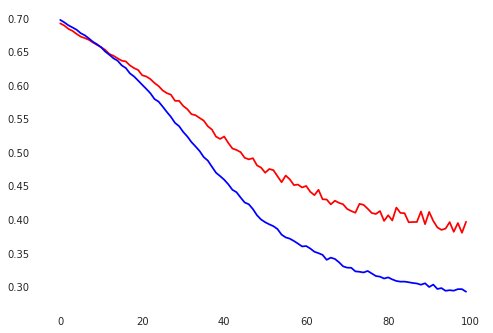

In [46]:
# Printăm comparativ cu roșu loss-ul de pe setul de validare și cu albastru loss-ul de pe setul de validare.
plt.plot(train_losses, "r-", test_losses, "b-")

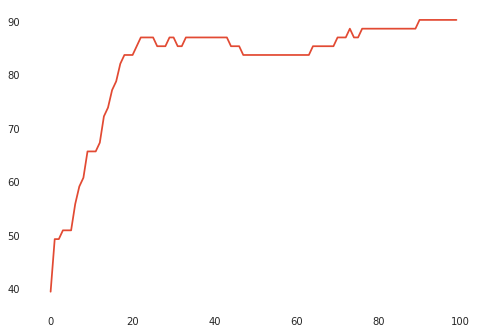

In [47]:
plt.plot(accuracies)

In [0]:
#Let's try and feed a single example in the neural network and see if it gets it right
def try_a_single_example_with_the_network(index_from_the_validation_set):
  with torch.no_grad():
    pred_test = net(validationDataset[index_from_the_validation_set][0].view(1, -1))
    _, preds_y = torch.max(pred_test, 1)
    return preds_y

In [0]:
index_of_test=30

In [52]:
print(f"Neural network response is: {try_a_single_example_with_the_network(index_of_test).item()}")
print(f"Actual response is: {validationDataset[index_of_test][1].view(-1).item()}")

Neural network response is: 1
Actual response is: 0
